In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('synthetic_weather.csv')
print("Available columns:", data.columns.tolist())  # Debug print

# Map the correct column names
X = data[['temp', 'humidity', 'wind_speed', 'pressure', 'precip']]
y = data['temp'].shift(-1)  # Next day's temperature

# Drop rows with NaN values (last row will have NaN in y)
data = data.dropna()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Build model with better architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile with metrics
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

# Add early stopping and tensorboard callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train with validation split
history = model.fit(
    X_train_scaled, 
    y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = y_test.values.reshape(-1, 1)

mae = np.mean(np.abs(y_pred - y_true))
rmse = np.sqrt(np.mean((y_pred - y_true)**2))

print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:.2f}°C")
print(f"Root Mean Squared Error: {rmse:.2f}°C")

# Save model and scalers
model.save('weather_model.h5')
from joblib import dump
dump(scaler_X, 'scaler_X.joblib')
dump(scaler_y, 'scaler_y.joblib')
print("\nModel and scalers saved successfully")

KeyError: "None of [Index(['Temperature', 'Humidity', 'Pressure', 'Wind_Speed', 'Precipitation',\n       'Cloud_Cover', 'Visibility'],\n      dtype='object')] are in the [columns]"

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('synthetic_weather.csv')
print("Available columns:", data.columns.tolist())  # Debug print

# Map the correct column names
X = data[['temp', 'humidity', 'wind_speed', 'pressure', 'precip']]
y = data['temp'].shift(-1)  # Next day's temperature

# Drop rows with NaN values (last row will have NaN in y)
data = data.dropna()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Build model with better architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile with metrics
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

# Add early stopping and tensorboard callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train with validation split
history = model.fit(
    X_train_scaled, 
    y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = y_test.values.reshape(-1, 1)

mae = np.mean(np.abs(y_pred - y_true))
rmse = np.sqrt(np.mean((y_pred - y_true)**2))

print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:.2f}°C")
print(f"Root Mean Squared Error: {rmse:.2f}°C")

# Save model and scalers
model.save('weather_model.h5')
from joblib import dump
dump(scaler_X, 'scaler_X.joblib')
dump(scaler_y, 'scaler_y.joblib')
print("\nModel and scalers saved successfully")

In [ ]:
# WEATHER_PREDICTION_NN.ipynb

# Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import joblib

In [ ]:
# Generate synthetic dataset

from datetime import datetime, timedelta

np.random.seed(0)
N = 1000
start = datetime(2020,1,1)

rows = []
for i in range(N):
    d = start + timedelta(days=i)
    temp_mean = 15 + 10*np.sin(2*np.pi*i/365) + np.random.normal(0,2)
    humidity = 60 + 20*np.cos(2*np.pi*i/365) + np.random.normal(0,5)
    wind_speed = abs(np.random.normal(5,2))
    pressure = 1013 + np.random.normal(0,5)
    precip = max(0, np.random.exponential(0.1)-0.05)
    rows.append([d.strftime('%Y-%m-%d'), temp_mean, humidity, wind_speed, pressure, precip])



df = pd.DataFrame(rows, columns=['date','temp','humidity','wind_speed','pressure','precip'])
df.to_csv('synthetic_weather.csv', index=False)
df.head()
    

,date,temp,humidity,wind_speed,pressure,precip
0,2020-01-01,18.528105,82.000786,6.957476,1024.204466,0.005105
1,2020-01-02,13.486685,89.846659,7.532237,1010.470617,0.025267
2,2020-01-03,16.866292,80.596523,5.887726,1014.668372,0.334522
3,2020-01-04,15.153032,87.024359,4.251057,1014.375992,0.052143
4,2020-01-05,10.582045,83.220699,6.728872,1009.289175,0.010908


In [ ]:
# Load and preprocess data

df = pd.read_csv('synthetic_weather.csv')

df['temp_lag1'] = df['temp'].shift(1)
df['temp_lag2'] = df['temp'].shift(2)
df['day_of_year'] = pd.to_datetime(df['date']).dt.dayofyear

df = df.dropna().reset_index(drop=True)

features = ['temp_lag1','temp_lag2','humidity','wind_speed','pressure','precip','day_of_year']
X = df[features].values
y = df['temp'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler_X = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).flatten()
    

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5014 - mae: 0.5814 - val_loss: 0.2414 - val_mae: 0.3992
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2030 - mae: 0.3672 - val_loss: 0.2116 - val_mae: 0.3749
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1659 - mae: 0.3314 - val_loss: 0.1592 - val_mae: 0.3247
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1594 - mae: 0.3178 - val_loss: 0.1534 - val_mae: 0.3169
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1412 - mae: 0.2978 - val_loss: 0.1600 - val_mae: 0.3216
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1388 - mae: 0.2964 - val_loss: 0.1486 - val_mae: 0.3100
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1338 - mae: 0.2957 - val_loss: 0.1431 - val_mae: 0.3065
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1320 - mae: 0.2893 - val_loss: 0.1421 - val_mae: 0.3033
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.130

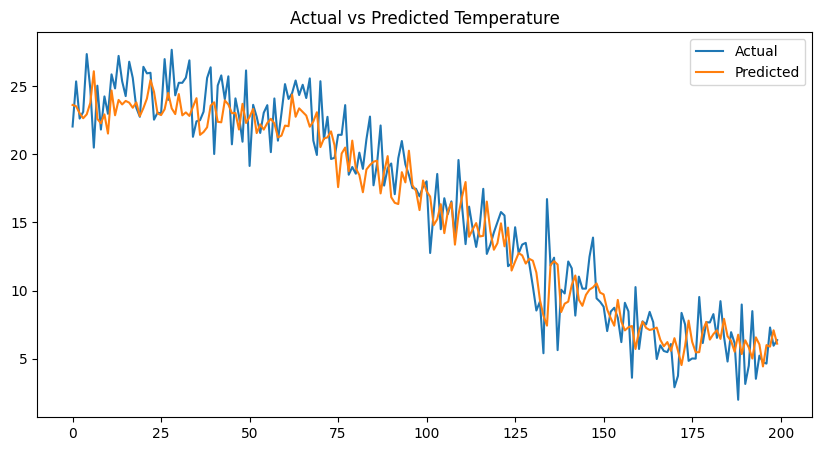

In [ ]:
# Build, train, and evaluate the neural network

model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train_scaled, validation_split=0.1, epochs=100, batch_size=32)

pred_scaled = model.predict(X_test_scaled).flatten()
pred = scaler_y.inverse_transform(pred_scaled.reshape(-1,1)).flatten()

mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred)

print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}')

plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual')
plt.plot(pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Temperature')
plt.show()
    

In [ ]:
# Save model and scalers

model.save('weather_model.h5')
joblib.dump(scaler_X, 'scaler_X.joblib')
joblib.dump(scaler_y, 'scaler_y.joblib')
print('Model and scalers saved.')
    

Model and scalers saved.
